<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sequential" data-toc-modified-id="Sequential-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sequential</a></span></li><li><span><a href="#Callable" data-toc-modified-id="Callable-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Callable</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#실습" data-toc-modified-id="실습-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>실습</a></span></li><li><span><a href="#Overfitting-방지" data-toc-modified-id="Overfitting-방지-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Overfitting 방지</a></span><ul class="toc-item"><li><span><a href="#Drop-Out" data-toc-modified-id="Drop-Out-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Drop Out</a></span></li><li><span><a href="#Weight-Regularization" data-toc-modified-id="Weight-Regularization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Weight Regularization</a></span></li></ul></li><li><span><a href="#Keras-이해하기" data-toc-modified-id="Keras-이해하기-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Keras 이해하기</a></span><ul class="toc-item"><li><span><a href="#Layer" data-toc-modified-id="Layer-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Layer</a></span></li><li><span><a href="#Sequential" data-toc-modified-id="Sequential-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Sequential</a></span></li></ul></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/8th_ai_lecture_fundamental](https://github.com/realblack0/8th_ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## Sequential

In [1]:
import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize (MinMaxScaler)
X_train = X_train / 255.
X_test = X_test / 255.

In [4]:
# flatten
X_train = X_train.reshape(10000, -1)
X_test = X_test.reshape(10000, -1)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Callable
1. 함수
2. 클래스
3. \_\_call\_\_이 정의된 인스턴스

In [7]:
# __call__을 정의한 class의 instance는 callable이다.
class A:
    def __call__(self, x):
        self.x = x
        print(self.x)

In [8]:
# 인스턴스 할당
a = A()

In [9]:
# __call__
a(4)

4


In [10]:
# 할당을 생략하고 괄호를 연달아서 사용할 수 있다.
A()(4)

4


## Model

`Model`은 Functional Paradigm(함수형 패러다임)으로 모델을 만드는 방법이다.  

In [11]:
# 첫번째 레이어에 input_shape을 넣는 것과 똑같다.
input_layer = tf.keras.layers.Input(shape=(784,))

In [12]:
# Input은 이론상 layer가 아니기 때문에 layers 모듈이 아닌 keras에서 바로 사용하기도 한다.
# 위 코드와 차이는 없다. (편한 것 사용)
input_layer = tf.keras.Input((784,))

In [13]:
# 이전 레이어의 결과를 다음 레이어의 input으로 넣는다.

# 괄호 뒤에 또 괄호를 붙일 수 있다. (callable) 
# 첫번째 괄호 : 클래스
# 두번째 괄호 : __call__이 정의 된 경우

dense1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)

In [14]:
# 이전 레이어의 output인 dense1을 이번 레이어의 input으로 사용한다.
dense2 = tf.keras.layers.Dense(64, activation='relu')(dense1)

In [15]:
output = tf.keras.layers.Dense(10, activation='softmax')(dense2)

In [16]:
# 파라미터 이름에 's'가 붙었다. => 복수형 => list로 여러개 묶어서 넣을 수 있다.
model_fn = tf.keras.models.Model(inputs=input_layer, outputs=output)

In [17]:
model_fn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


`Model`은 layer마다 input을 사용자가 마음대로 정할 수 있다.  
- 하나의 input을 여러개의 layer에 동시에 넣을 수도 있다.
- 여러개의 output을 합쳐서 layer에 넣을 수도 있다.
- layer를 중간에 건너 뛰고 다다음 layer에 input으로 넣을 수도 있다. 
- 즉, 복잡한 모델을 만들 수 있다.  

`Sequential`은 바로 앞 layer의 output을 다음 layer의 input으로 전달한다.
- 일방향으로 전달만 가능하며, 구조를 마음대로 바꿀 수 없다.
- 복잡한 모델을 만들 수 없다.

다음 두 모델은 다른 방법으로 만들었지만 같은 구조이다.

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
# from ~ import ~를 사용하면 코드를 더 깔끔하게 쓸 수 있다.
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_ = Input((784,))
dense1_ = Dense(64, activation='relu')(input_)
dense2_ = Dense(64, activation='relu')(dense1_)  
output_ = Dense(10, activation='softmax')(dense2_)

model_fn_ = Model(inputs=input_, outputs=output_)


다음은 복잡한 구조의 모델의 예시이다.  
`Sequential`로는 이런 모델 구조를 만들 수 없다. 

In [20]:
input_ = Input((784,))
dense1_ = Dense(64, activation='relu')(input_) # 같은 input을 넣을 수 있다.
dense2_ = Dense(64, activation='relu')(input_) # 같은 input을 넣을 수 있다.
dense3_ = Dense(64, activation='relu')(dense1_ + dense2_) # 합쳐서 input으로 넣을 수 있다. 
out_ = Dense(10, activation='softmax')(dense3_)

model_fn_ = Model(inputs=input_, outputs=out_)

model_fn_.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 64)           50240       input_4[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 64)           50240       input_4[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_add (TensorFlowOpLa [(None, 64)]         0           dense_12[0][0]                   
                                                                 dense_13[0][0]             

## 실습

이번 수업은 tensorflow 공식 tutorial [과대적합 과소적합](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko)을 참조하여 진행되었습니다.

In [21]:
import tensorflow as tf

In [32]:
NUM_WORDS = 10000

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data()

In [33]:
# 구조가 특이하다. 
# list 안에 array가 아니고, array 안에 list가 있다. 
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [34]:
# list가 2만5천개 있다.
X_train.shape

(25000,)

In [35]:
# 어떤 숫자들이 나열되어 있다. 
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [27]:
# imdb는 단어에 고유번호를 부여하였다. 
word_index =tf.keras.datasets.imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [28]:
# 1이라고 인코딩된 숫자를 단어로 변환하면 'the'이다.
for i,j in word_index.items():
    if j==1:
        print(i)

the


In [43]:
# 10개만 뽑아봐도 데이터마다 길이가 다르다. 
# 기계학습을 하기 위해서는 shape이 동일해야하므로, padding을 추가해서 길이를 맞춘다.(전통적인 방식)
for i in X_train[:10]:
    print(len(i))

218
189
141
550
147
43
123
562
233
130


OneHotEncoding은 1이 한 개만 있도록 인코딩한다.  
MultiHotEncoding은 1이 여러개 있을 수 있다.  
자연어처리에서는 MultiHotEncoding으로 데이터를 벡터화한다. (오래된 기법)

* 우리 수업은 자연어처리 수업이 아니므로 자연어 처리 기법에 대한 소개는 넘어간다.

In [49]:
NUM_WORDS = 10000

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


X_train = multi_hot_sequences(X_train, dimension=NUM_WORDS)
y_train = multi_hot_sequences(X_test, dimension=NUM_WORDS)

tutorial에서는 `Sequential`을 이용해서 모델을 만들었다.  
우리는 functional paradigm을 배웠으므로 `Model`로 동일한 모델을 만들 수 있다.

In [38]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


위 코드를 Functional Paradigm으로 바꾸면 다음과 같다.

In [46]:
input_ = tf.keras.layers.Input((NUM_WORDS,))
dense1 = tf.keras.layers.Dense(16, activation='relu')(input_)
dense2 = tf.keras.layers.Dense(16, activation='relu')(dense1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

model_fn = tf.keras.models.Model(inputs=input_, outputs=output)

model_fn.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model_fn.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_fn.fit(X_train, y_train, epochs=1)

Train on 25000 samples
25000/25000 [==============================] - 5s 218us/sample - loss: 0.3299 - accuracy: 0.8633 - binary_crossentropy: 0.3299


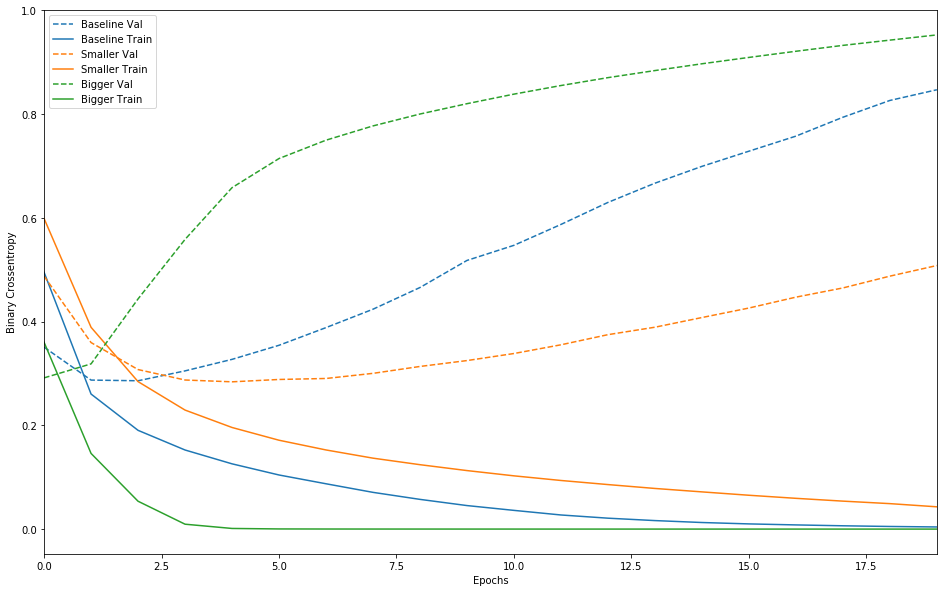

위 learning curve는 tutorial에 있는 이미지를 그대로 가져온 것입니다.
- validation이 커지기 시작하면 overfitting이다. 
- Bigger는 시작하자마자 val이 상승하였다 -> 시작부터 overfitting -> 사용할 수 없는 데이터
- overfitting되기 전에 epoch을 멈추어야한다.
- Baseline과 Smaller 둘 다 적정한 지점에서 epoch을 멈출 수 있다. 같은 성능이면 단순한 모델이 더 좋다. 두 모델은 적정한 지점에서 성능이 비슷한데, 시간적 복잡도를 고려하여 1epoch당 소요 시간을 비교해봐야한다.

## Overfitting 방지

### Drop Out

- Dropout은 overfitting을 방지하기 위해서 사용하는 기법이다.  
- 주의) overfitting을 막는 것이 아니다. overfitting이 오는 시점을 늦춰서 epoch을 몇번 더 돌 수 있게 해준다.
- Dropout은 predict할 때는 연결을 끊지 않는다. (학습할 때만 작동한다)

In [50]:
# keras는 Dropout 레이어로 쉽게 적용할 수 있다.

input_ = tf.keras.layers.Input((NUM_WORDS,))
dense1 = tf.keras.layers.Dense(16, activation='relu')(input_)
drop1 = tf.keras.layers.Dropout(0.2) # 학습할 때 연결의 20%를 랜덤하게 끊는다. 
dense2 = tf.keras.layers.Dense(16, activation='relu')(dense1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

model_fn = tf.keras.models.Model(inputs=input_, outputs=output)

model_fn.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model_fn.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**Overfitting을 방지하는 방법**
- 더 많은 data
- model 단순화
- bagging
- dropout
- weight regularization
- data augmentation(영상에서 사용함)

### Weight Regularization

가중치의 크기를 제한시킨다.  
가중치는 Linear Regression의 계수와 비교할 수 있다.  
regression 그래프에서는 기울기와 같다.  
즉, 가중치가 크면 예측값이 급격하게 변하는 경향이 있다.  
regularization은 기울기를 완만하게 해서 예측값이 급격하게 변하지 않도록 해준다.  

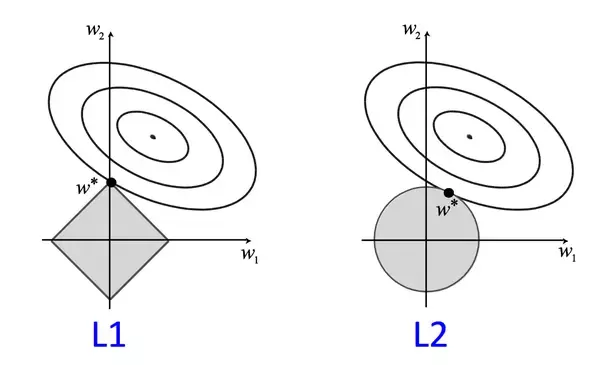

l1는 lasso라고도 불리며, l2는 ridge 또는 weight decay 기법이라고도 부른다.  
위 그림에서 색칠된 영역 안에 weight가 존재하도록 크기를 규제한다.  
l1은 마름모 모양이어서 weight가 0이 되는 경우가 많다.

In [51]:
# keras는 layer를 인스턴스화할 때 파라미터를 추가해서 regularization을 적용할 수 있다.

input_ = tf.keras.layers.Input((NUM_WORDS,))
dense1 = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer='l2')(input_) # weight를 규제
dense2 = tf.keras.layers.Dense(16, activation='relu', bias_regularizer=='l2')(dense1) # bias를 규제
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

model_fn = tf.keras.models.Model(inputs=input_, outputs=output)

model_fn.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

model_fn.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10000)]           0         
_________________________________________________________________
dense_34 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Keras 이해하기

### Layer

In [52]:
import tensorflow as tf

In [60]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, use_bias=True, input_shape=(2,))) # default

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [55]:
# bias=False하면 bias를 만들지 않는다.
# param 개수가 줄어들었다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, use_bias=False, input_shape=(2,)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [62]:
# kernel_initializer는 weight의 초기값을 설정한다.
# ones는 1로 만든다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, use_bias=False, kernel_initializer='one', input_shape=(2,)))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [66]:
x = np.array([[1,2], [2,3], [3,4]])

In [67]:
# predict는 weight 행렬과 input을 곱해주는 동작만 하는 것이다.
model.predict(x)

array([[3., 3.],
       [5., 5.],
       [7., 7.]], dtype=float32)

$x = \left( \array{1 \ 2 \\ 2 \ 3 \\ 3 \ 4} \right)$  
$weight = \left( \array{1 \ 1 \\ 1 \ 1} \right)$  
$x \cdot weight = \left( \array{3 \ 3 \\ 5 \ 5 \\ 7 \ 7} \right)$

In [68]:
# bias_initializer는 bias의 초기값을 설정한다.
# ones는 1로 만든다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, kernel_initializer='one', bias_initializer='ones', input_shape=(2,)))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [69]:
# predict는 weight 행렬과 input을 곱해주는 동작만 하는 것이다.
model.predict(x)

array([[4., 4.],
       [6., 6.],
       [8., 8.]], dtype=float32)

$x = \left( \array{1 \ 2 \\ 2 \ 3 \\ 3 \ 4} \right)$  
$weight = \left( \array{1 \ 1 \\ 1 \ 1} \right)$  
$bias = \left( \array{1 \ 1 } \right)$  
$x \cdot weight + bias = \left( \array{4 \ 4 \\ 6 \ 6 \\ 8 \ 8} \right)$, (bias는 broadcasting)

In [70]:
# initializer를 지정하지 않으면 랜덤값으로 생성한다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,)))

model.predict(x)

array([[-1.4356872,  1.6435685],
       [-1.7183504,  2.7294202],
       [-2.0010138,  3.8152716]], dtype=float32)

In [71]:
# 랜덤이기 때문에 실행할 때마다 다른 값으로 초기화된다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,)))

model.predict(x)

array([[-2.47647  ,  1.6842119],
       [-3.8497245,  2.519456 ],
       [-5.222979 ,  3.3547   ]], dtype=float32)

### Sequential

In [72]:
# layer 대신에 model을 add할 수 있다.
# Sequential은 논리적인 개념이다. 
# 실제 이론적인 개념은 layer이다.
model2 = tf.keras.models.Sequential()
model2.add(model)

In [73]:
# Sequential이 레이어처럼 출력되었다.
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [74]:
# predict도 된다.
model2.predict(x)

array([[-2.47647  ,  1.6842119],
       [-3.8497245,  2.519456 ],
       [-5.222979 ,  3.3547   ]], dtype=float32)

In [78]:
# 모델을 중첩해서 만들 수 있다.
model3 = tf.keras.models.Sequential()
model3.add(model)
model3.add(model2)

In [79]:
model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 2)                 6         
_________________________________________________________________
sequential_11 (Sequential)   (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [80]:
# weights로 모델의 가중치를 확인할 수 있다.
# weights는 kernel과 bias를 통칭한다.
model.weights

[<tf.Variable 'dense_44/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.27003872, -0.01372349],
        [-1.1032157 ,  0.8489677 ]], dtype=float32)>,
 <tf.Variable 'dense_44/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [81]:
# layers는 모델의 레이어에 접근할 수 있다.
# list로 반환 -> sequence -> Sequential은 단순하게 레이어를 쌓는것만 가능
model.layers

In [83]:
# model2는 model을 add했었다. 그러므로 weights가 model과 같다.
model2.weights

[<tf.Variable 'dense_44/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.27003872, -0.01372349],
        [-1.1032157 ,  0.8489677 ]], dtype=float32)>,
 <tf.Variable 'dense_44/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

In [82]:
# model2의 layers에는 model 객체가 있다.
model2.layers

In [84]:
# model2의 레이어는 model 객체가 맞다.
model is model2.layers[0]

True

In [86]:
# MobileNet은 모바일에서도 사용할 수 있게 만든 가벼운 모델이다.
# keras에서는 유명한 모델을 미리 만들어서 제공한다.
# version 1과 2를 비교해보자.
from tensorflow.keras.applications import MobileNet, MobileNetV2

In [87]:
mn = MobileNet()

In [88]:
mn2 = MobileNetV2()

In [90]:
# Sequential로 만들 수 있다.
mn.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [89]:
# Connected to 라는 것이 생겼다. 
# 일렬로 연결된 구조가 아니라 복잡한 구조의 모델이다. 
# Sequential로는 만들 수 없다.
# Sequential은 multi inputs, multi outputs도 못 만든다.
mn2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_12[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [94]:
len(mn.layers)

93

In [93]:
len(mn2.layers)

157